# Replication: CS-Flow MVTec AD Cable, rotated

In this notebook, we rotate the training data for the MVTec AD category *cable*.

25% of all data is each 0°, 90°, 180°, and 270° rotated.

In [1]:
from __init__ import activate_cs_flow_config, CSFLOW_DIR
import shutil

# First, we activate the correct configuration.
activate_cs_flow_config(name='mvtec-cable')

# Extracting Features

In [2]:
import os
import numpy as np
from src.repos.cs_flow.utils import load_datasets, make_dataloaders
from src.repos.cs_flow.extract_features import extract
import src.repos.cs_flow.config as c


prepend_dir = str(CSFLOW_DIR.resolve()) + '/'
export_name = c.class_name
export_dir = prepend_dir + 'data/features/' + export_name + '/'
image_paths = export_dir + c.class_name + '_image_paths.npy'
c.pre_extracted = False
os.makedirs(export_dir, exist_ok=True)
train_set, test_set = load_datasets(prepend_dir + c.dataset_path, c.class_name)
train_loader, test_loader = make_dataloaders(train_set, test_set)

In [3]:
from pathlib import Path

if not Path(image_paths).exists():
    extract(train_loader, test_loader, export_dir, c.class_name)
    paths = [p for p, l in test_set.samples]
    np.save(export_dir + c.class_name + '_image_paths.npy', paths)

Loaded pretrained weights for efficientnet-b5


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.17s/it]

 21%|██▏       | 3/14 [00:03<00:11,  1.09s/it]

 29%|██▊       | 4/14 [00:04<00:10,  1.05s/it]

 36%|███▌      | 5/14 [00:05<00:09,  1.03s/it]

 43%|████▎     | 6/14 [00:06<00:08,  1.01s/it]

 50%|█████     | 7/14 [00:07<00:07,  1.02s/it]

 57%|█████▋    | 8/14 [00:08<00:06,  1.01s/it]

 64%|██████▍   | 9/14 [00:09<00:04,  1.00it/s]

 71%|███████▏  | 10/14 [00:10<00:03,  1.01it/s]

 79%|███████▊  | 11/14 [00:11<00:02,  1.01it/s]

 86%|████████▌ | 12/14 [00:12<00:01,  1.01it/s]

 93%|█████████▎| 13/14 [00:13<00:00,  1.02it/s]

100%|██████████| 14/14 [00:14<00:00,  1.02it/s]

100%|██████████| 14/14 [00:14<00:00,  1.02s/it]

  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:00<00:11,  1.04it/s]

 15%|█▌        | 2/13 [00:01<00:10,  1.03it/s]

 23%|██▎       | 3/13 [00:02<00:09,  1.02it/s]

 31%|███       | 4/13 [00:03<00:08,  1.01it/s]

 38%|███▊      | 5/13 [00:04<00:07,  1.00it/s]

 46%|████▌     | 6/13 [00:05<00:06,  1.01it/s]

 54%|█████▍    | 7/13 [00:06<00:05,  1.02it/s]

 62%|██████▏   | 8/13 [00:07<00:04,  1.02it/s]

 69%|██████▉   | 9/13 [00:08<00:03,  1.02it/s]

 77%|███████▋  | 10/13 [00:09<00:02,  1.01it/s]

 85%|████████▍ | 11/13 [00:10<00:02,  1.00s/it]

 92%|█████████▏| 12/13 [00:11<00:01,  1.00s/it]

100%|██████████| 13/13 [00:12<00:00,  1.00it/s]

100%|██████████| 13/13 [00:12<00:00,  1.01it/s]

# Training

In [4]:
from src.repos.cs_flow.train import train

results = train(train_loader, test_loader)
if isinstance(results, tuple):
    model = results[0]
    print(results[1:])
else:
    model = results

Loaded pretrained weights for efficientnet-b5

Train epoch 0


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.42s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.20s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.19s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.19s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.17s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.17s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.19s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.20s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

Epoch: 0.0 	 train loss: 14.9000


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.15s/it]

 14%|█▍        | 2/14 [00:02<00:13,  1.14s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.14s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.16s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.17s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.20s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.18s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.20s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.20s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.25s/it]

100%|██████████| 14/14 [00:16<00:00,  1.23s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.20s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.18s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.18s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.19s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.20s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.18s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.17s/it]

100%|██████████| 14/14 [00:16<00:00,  1.16s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.19s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.18s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.19s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.19s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.20s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.20s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.18s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.17s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.18s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.20s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

Epoch: 0.4 	 train loss: 7.2647


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.20s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.20s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.19s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.18s/it]

 71%|███████▏  | 10/14 [00:11<00:04,  1.17s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.18s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.19s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.19s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.19s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.17s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

Epoch: 0.8 	 train loss: 2.2890


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.14s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.17s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.22s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.20s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.20s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.21s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.14s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.18s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.19s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.19s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.18s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.17s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.17s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.19s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

Epoch: 0.12 	 train loss: 1.9714


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.19s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.20s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.18s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.20s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.21s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.19s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.21s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.20s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.20s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.20s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.21s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

Epoch: 0.16 	 train loss: 1.9150


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.18s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.18s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.18s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.18s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.19s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.17s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.17s/it]

100%|██████████| 14/14 [00:16<00:00,  1.20s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:14,  1.14s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.17s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.19s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.20s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.20s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.19s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.18s/it]

 57%|█████▋    | 8/14 [00:09<00:06,  1.17s/it]

 64%|██████▍   | 9/14 [00:10<00:05,  1.17s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.19s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.17s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.17s/it]

100%|██████████| 14/14 [00:16<00:00,  1.17s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

Epoch: 0.20 	 train loss: 1.8675


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.18s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.20s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.22s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.22s/it]

100%|██████████| 14/14 [00:16<00:00,  1.19s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.22s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.21s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.20s/it]

100%|██████████| 14/14 [00:17<00:00,  1.18s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.20s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.19s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.20s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.18s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.18s/it]

100%|██████████| 14/14 [00:16<00:00,  1.22s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.20s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.19s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.19s/it]

100%|██████████| 14/14 [00:17<00:00,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.22s/it]

Epoch: 0.24 	 train loss: 1.8467


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.19s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

Epoch: 0.28 	 train loss: 1.8086


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:20,  1.56s/it]

 14%|█▍        | 2/14 [00:03<00:18,  1.53s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.48s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.44s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.43s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.43s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.43s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.44s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.40s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:17<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.39s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.39s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.41s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.42s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.45s/it]

100%|██████████| 14/14 [00:19<00:00,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

Epoch: 0.32 	 train loss: 1.8070


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.53s/it]

 14%|█▍        | 2/14 [00:03<00:18,  1.52s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.48s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.44s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:11<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.43s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.38s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.40s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.41s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.43s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.42s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

Epoch: 0.36 	 train loss: 1.7631


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.43s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.39s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

Epoch: 0.40 	 train loss: 1.7467


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.39s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.42s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.42s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.42s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.42s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.44s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.46s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.50s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.46s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.44s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.45s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.43s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

Epoch: 0.44 	 train loss: 1.7290


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.41s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.42s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.44s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.47s/it]

 50%|█████     | 7/14 [00:09<00:10,  1.43s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

Epoch: 0.48 	 train loss: 1.6703


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.17s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.41s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

Epoch: 0.52 	 train loss: 1.6428


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:20,  1.55s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.47s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.39s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.40s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

Epoch: 0.56 	 train loss: 1.6051


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.48s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.49s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.44s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.48s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.52s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.49s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.44s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.39s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.49s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.45s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.42s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.40s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.41s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.33s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]


Compute loss and scores on test set:


  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:01<00:15,  1.29s/it]

 15%|█▌        | 2/13 [00:02<00:14,  1.29s/it]

 23%|██▎       | 3/13 [00:03<00:12,  1.28s/it]

 31%|███       | 4/13 [00:05<00:11,  1.30s/it]

 38%|███▊      | 5/13 [00:06<00:10,  1.27s/it]

 46%|████▌     | 6/13 [00:07<00:08,  1.28s/it]

 54%|█████▍    | 7/13 [00:09<00:07,  1.32s/it]

 62%|██████▏   | 8/13 [00:10<00:06,  1.31s/it]

 69%|██████▉   | 9/13 [00:11<00:05,  1.29s/it]

 77%|███████▋  | 10/13 [00:12<00:03,  1.30s/it]

 85%|████████▍ | 11/13 [00:14<00:02,  1.33s/it]

 92%|█████████▏| 12/13 [00:15<00:01,  1.35s/it]

100%|██████████| 13/13 [00:17<00:00,  1.36s/it]

100%|██████████| 13/13 [00:17<00:00,  1.32s/it]

Epoch: 0 	 test_loss: 1.6827
AUROC: 	 last: 0.6523 	 max: 0.6523 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 1


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.42s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.42s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.42s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.49s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.44s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.41s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.39s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.37s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.43s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.44s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.45s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.43s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.45s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.40s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.28s/it]

100%|██████████| 14/14 [00:19<00:00,  1.25s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:20,  1.58s/it]

 14%|█▍        | 2/14 [00:03<00:18,  1.55s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.48s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.45s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.52s/it]

 43%|████▎     | 6/14 [00:09<00:11,  1.50s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.41s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:15<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:20,  1.58s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.47s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.42s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.50s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.45s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.49s/it]

 14%|█▍        | 2/14 [00:03<00:18,  1.55s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.54s/it]

 29%|██▊       | 4/14 [00:06<00:15,  1.53s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.43s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.41s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.48s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.44s/it]

 86%|████████▌ | 12/14 [00:17<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.42s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.42s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.45s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.47s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.45s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.47s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.42s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.40s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.45s/it]

100%|██████████| 14/14 [00:19<00:00,  1.48s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.42s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.48s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.51s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.44s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.39s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.42s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.42s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.21s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.34s/it]

100%|██████████| 14/14 [00:17<00:00,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.32s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.44s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.40s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.39s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.25s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.21s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.21s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.49s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.33s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.19s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]


Compute loss and scores on test set:


  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:01<00:17,  1.46s/it]

 15%|█▌        | 2/13 [00:02<00:14,  1.36s/it]

 23%|██▎       | 3/13 [00:03<00:12,  1.26s/it]

 31%|███       | 4/13 [00:05<00:11,  1.26s/it]

 38%|███▊      | 5/13 [00:06<00:09,  1.22s/it]

 46%|████▌     | 6/13 [00:07<00:08,  1.18s/it]

 54%|█████▍    | 7/13 [00:08<00:07,  1.21s/it]

 62%|██████▏   | 8/13 [00:09<00:06,  1.23s/it]

 69%|██████▉   | 9/13 [00:11<00:04,  1.21s/it]

 77%|███████▋  | 10/13 [00:12<00:03,  1.23s/it]

 85%|████████▍ | 11/13 [00:13<00:02,  1.26s/it]

 92%|█████████▏| 12/13 [00:14<00:01,  1.26s/it]

100%|██████████| 13/13 [00:16<00:00,  1.26s/it]

100%|██████████| 13/13 [00:16<00:00,  1.25s/it]

Epoch: 1 	 test_loss: 1.4099
AUROC: 	 last: 0.5922 	 max: 0.6523 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 2


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.21s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.40s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.41s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.22s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.25s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.39s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.21s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.39s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.24s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.18s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.19s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.19s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.19s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.21s/it]

100%|██████████| 14/14 [00:16<00:00,  1.22s/it]

100%|██████████| 14/14 [00:16<00:00,  1.21s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.19s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.22s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.22s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.21s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.20s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.19s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.21s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.21s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.22s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.22s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.23s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.24s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.22s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.20s/it]

 64%|██████▍   | 9/14 [00:10<00:06,  1.21s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.21s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.20s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:15<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.20s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.20s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.22s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.23s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.25s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.41s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.25s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.17s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.19s/it]

 29%|██▊       | 4/14 [00:04<00:12,  1.24s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.26s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.22s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.21s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.19s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.17s/it]

 21%|██▏       | 3/14 [00:03<00:12,  1.18s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.18s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.16s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:20,  1.56s/it]

 14%|█▍        | 2/14 [00:03<00:18,  1.50s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.51s/it]

 29%|██▊       | 4/14 [00:06<00:15,  1.51s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.46s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.43s/it]

 50%|█████     | 7/14 [00:10<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.42s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.44s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.46s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.41s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.41s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.47s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.48s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.43s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.44s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.39s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.39s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.39s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.40s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.41s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.45s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.42s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.40s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.39s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.31s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.23s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.21s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.22s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.33s/it]

100%|██████████| 14/14 [00:17<00:00,  1.30s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.44s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.44s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.43s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.40s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.36s/it]

100%|██████████| 14/14 [00:19<00:00,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.40s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.45s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.49s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.50s/it]

 43%|████▎     | 6/14 [00:08<00:12,  1.51s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.49s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.39s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.32s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.29s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.23s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.23s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.39s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]


Compute loss and scores on test set:


  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:01<00:15,  1.31s/it]

 15%|█▌        | 2/13 [00:02<00:14,  1.35s/it]

 23%|██▎       | 3/13 [00:03<00:13,  1.32s/it]

 31%|███       | 4/13 [00:05<00:11,  1.26s/it]

 38%|███▊      | 5/13 [00:06<00:10,  1.28s/it]

 46%|████▌     | 6/13 [00:07<00:09,  1.33s/it]

 54%|█████▍    | 7/13 [00:09<00:08,  1.35s/it]

 62%|██████▏   | 8/13 [00:10<00:06,  1.34s/it]

 69%|██████▉   | 9/13 [00:11<00:05,  1.30s/it]

 77%|███████▋  | 10/13 [00:13<00:03,  1.27s/it]

 85%|████████▍ | 11/13 [00:14<00:02,  1.26s/it]

 92%|█████████▏| 12/13 [00:15<00:01,  1.27s/it]

100%|██████████| 13/13 [00:16<00:00,  1.24s/it]

100%|██████████| 13/13 [00:16<00:00,  1.29s/it]

Epoch: 2 	 test_loss: 1.3963
AUROC: 	 last: 0.6034 	 max: 0.6523 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 3


  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.20s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.20s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.22s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.42s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.46s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.46s/it]

100%|██████████| 14/14 [00:18<00:00,  1.45s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.52s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.47s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.26s/it]

100%|██████████| 14/14 [00:18<00:00,  1.25s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.41s/it]

100%|██████████| 14/14 [00:18<00:00,  1.42s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.41s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.27s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.41s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.41s/it]

100%|██████████| 14/14 [00:18<00:00,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.24s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.20s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.18s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.20s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.19s/it]

 36%|███▌      | 5/14 [00:06<00:10,  1.22s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:08<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.38s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.17s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.27s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.27s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:09<00:10,  1.44s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.27s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.24s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.26s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.43s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.41s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:20,  1.56s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.43s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.43s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.43s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.41s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.38s/it]

 79%|███████▊  | 11/14 [00:15<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.37s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.34s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.38s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.21s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.22s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.38s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.25s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.22s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.21s/it]

100%|██████████| 14/14 [00:17<00:00,  1.19s/it]

100%|██████████| 14/14 [00:17<00:00,  1.26s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.38s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.36s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.41s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.28s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.47s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.40s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.33s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.32s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.39s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.27s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.37s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.42s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.43s/it]

 50%|█████     | 7/14 [00:09<00:10,  1.43s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.37s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:20,  1.58s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.47s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.45s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.46s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.43s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.44s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.43s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.42s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.38s/it]

 79%|███████▊  | 11/14 [00:15<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.30s/it]

100%|██████████| 14/14 [00:19<00:00,  1.32s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.32s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.45s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.49s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.42s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:15<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.33s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.47s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.35s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.39s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.43s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.45s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.45s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.49s/it]

 29%|██▊       | 4/14 [00:06<00:15,  1.53s/it]

 36%|███▌      | 5/14 [00:07<00:13,  1.47s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.47s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.44s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.46s/it]

 64%|██████▍   | 9/14 [00:13<00:07,  1.42s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.37s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.39s/it]

 86%|████████▌ | 12/14 [00:17<00:02,  1.37s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.36s/it]

100%|██████████| 14/14 [00:19<00:00,  1.35s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.42s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.36s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.43s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.40s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.34s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.42s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.43s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.44s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.45s/it]

 50%|█████     | 7/14 [00:10<00:10,  1.45s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.44s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.40s/it]

 71%|███████▏  | 10/14 [00:14<00:05,  1.43s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.37s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.31s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.24s/it]

100%|██████████| 14/14 [00:18<00:00,  1.24s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.40s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.40s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.30s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.39s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.44s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.38s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.31s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.38s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.33s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.40s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.41s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.45s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.44s/it]

100%|██████████| 14/14 [00:19<00:00,  1.46s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:19,  1.47s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.34s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.30s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.39s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.37s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.39s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.42s/it]

100%|██████████| 14/14 [00:19<00:00,  1.37s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.31s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.43s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.43s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.30s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.26s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.24s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.23s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.25s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.23s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.26s/it]

 86%|████████▌ | 12/14 [00:14<00:02,  1.23s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

100%|██████████| 14/14 [00:17<00:00,  1.24s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.24s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.27s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.36s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.27s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.34s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.34s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.34s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.26s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.25s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.33s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.25s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.36s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.36s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.35s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.26s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.28s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.26s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.29s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.36s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.42s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.42s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.28s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.30s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.30s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.29s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.32s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.34s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.29s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.26s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.31s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.35s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.37s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.32s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.39s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.43s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.30s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.37s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.33s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.35s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.33s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.34s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.44s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.42s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.33s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.37s/it]

100%|██████████| 14/14 [00:19<00:00,  1.38s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:18,  1.45s/it]

 14%|█▍        | 2/14 [00:02<00:17,  1.48s/it]

 21%|██▏       | 3/14 [00:04<00:16,  1.48s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.45s/it]

 36%|███▌      | 5/14 [00:07<00:12,  1.41s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.27s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.25s/it]

100%|██████████| 14/14 [00:18<00:00,  1.23s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.28s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.29s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.39s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.36s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.36s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:11<00:08,  1.44s/it]

 64%|██████▍   | 9/14 [00:12<00:07,  1.40s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.39s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.35s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:19<00:00,  1.33s/it]

100%|██████████| 14/14 [00:19<00:00,  1.36s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.34s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.30s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.25s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.26s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.25s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.29s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.29s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.30s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.18s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.24s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.33s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.34s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:04,  1.24s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.24s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.29s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.30s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.36s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.35s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.29s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.30s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.30s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.27s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.27s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.26s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.31s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.35s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.40s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.40s/it]

100%|██████████| 14/14 [00:18<00:00,  1.41s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.35s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:14,  1.35s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.37s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.38s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.40s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.38s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.41s/it]

 79%|███████▊  | 11/14 [00:15<00:04,  1.40s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.49s/it]

 93%|█████████▎| 13/14 [00:18<00:01,  1.48s/it]

100%|██████████| 14/14 [00:19<00:00,  1.41s/it]

100%|██████████| 14/14 [00:19<00:00,  1.40s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:15,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.39s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.35s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.32s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.32s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.37s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.41s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.35s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.32s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.32s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.33s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.34s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.29s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.30s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.32s/it]

100%|██████████| 14/14 [00:18<00:00,  1.31s/it]

100%|██████████| 14/14 [00:18<00:00,  1.32s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.37s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.40s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.37s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.34s/it]

 43%|████▎     | 6/14 [00:08<00:10,  1.37s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.38s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.37s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.38s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.36s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.33s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.28s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.27s/it]

100%|██████████| 14/14 [00:18<00:00,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.33s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.28s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.25s/it]

 29%|██▊       | 4/14 [00:05<00:12,  1.27s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.25s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.24s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.26s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.26s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.25s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.26s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.25s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.27s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.28s/it]

100%|██████████| 14/14 [00:17<00:00,  1.29s/it]

100%|██████████| 14/14 [00:17<00:00,  1.27s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.25s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.21s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.39s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.31s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.32s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.28s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.29s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.31s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.33s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.35s/it]

 79%|███████▊  | 11/14 [00:14<00:04,  1.38s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.38s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.34s/it]

100%|██████████| 14/14 [00:18<00:00,  1.36s/it]

100%|██████████| 14/14 [00:18<00:00,  1.34s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.34s/it]

 14%|█▍        | 2/14 [00:02<00:15,  1.32s/it]

 21%|██▏       | 3/14 [00:03<00:14,  1.33s/it]

 29%|██▊       | 4/14 [00:05<00:13,  1.32s/it]

 36%|███▌      | 5/14 [00:06<00:11,  1.28s/it]

 43%|████▎     | 6/14 [00:07<00:10,  1.29s/it]

 50%|█████     | 7/14 [00:09<00:08,  1.28s/it]

 57%|█████▋    | 8/14 [00:10<00:07,  1.28s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.28s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.28s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.30s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.26s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.25s/it]

100%|██████████| 14/14 [00:17<00:00,  1.23s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:16,  1.23s/it]

 14%|█▍        | 2/14 [00:02<00:14,  1.23s/it]

 21%|██▏       | 3/14 [00:03<00:13,  1.23s/it]

 29%|██▊       | 4/14 [00:04<00:11,  1.20s/it]

 36%|███▌      | 5/14 [00:05<00:10,  1.18s/it]

 43%|████▎     | 6/14 [00:07<00:09,  1.23s/it]

 50%|█████     | 7/14 [00:08<00:08,  1.21s/it]

 57%|█████▋    | 8/14 [00:09<00:07,  1.24s/it]

 64%|██████▍   | 9/14 [00:11<00:06,  1.31s/it]

 71%|███████▏  | 10/14 [00:12<00:05,  1.30s/it]

 79%|███████▊  | 11/14 [00:13<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:15<00:02,  1.33s/it]

 93%|█████████▎| 13/14 [00:16<00:01,  1.31s/it]

100%|██████████| 14/14 [00:17<00:00,  1.33s/it]

100%|██████████| 14/14 [00:17<00:00,  1.28s/it]

  0%|          | 0/14 [00:00<?, ?it/s]

  7%|▋         | 1/14 [00:01<00:17,  1.31s/it]

 14%|█▍        | 2/14 [00:02<00:16,  1.33s/it]

 21%|██▏       | 3/14 [00:04<00:15,  1.38s/it]

 29%|██▊       | 4/14 [00:05<00:14,  1.41s/it]

 36%|███▌      | 5/14 [00:06<00:12,  1.39s/it]

 43%|████▎     | 6/14 [00:08<00:11,  1.39s/it]

 50%|█████     | 7/14 [00:09<00:09,  1.36s/it]

 57%|█████▋    | 8/14 [00:10<00:08,  1.36s/it]

 64%|██████▍   | 9/14 [00:12<00:06,  1.35s/it]

 71%|███████▏  | 10/14 [00:13<00:05,  1.32s/it]

 79%|███████▊  | 11/14 [00:14<00:03,  1.31s/it]

 86%|████████▌ | 12/14 [00:16<00:02,  1.31s/it]

 93%|█████████▎| 13/14 [00:17<00:01,  1.29s/it]

100%|██████████| 14/14 [00:18<00:00,  1.28s/it]

100%|██████████| 14/14 [00:18<00:00,  1.33s/it]


Compute loss and scores on test set:


  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:01<00:16,  1.35s/it]

 15%|█▌        | 2/13 [00:02<00:14,  1.34s/it]

 23%|██▎       | 3/13 [00:03<00:13,  1.33s/it]

 31%|███       | 4/13 [00:05<00:11,  1.28s/it]

 38%|███▊      | 5/13 [00:06<00:10,  1.28s/it]

 46%|████▌     | 6/13 [00:07<00:08,  1.26s/it]

 54%|█████▍    | 7/13 [00:08<00:07,  1.27s/it]

 62%|██████▏   | 8/13 [00:10<00:06,  1.23s/it]

 69%|██████▉   | 9/13 [00:11<00:05,  1.27s/it]

 77%|███████▋  | 10/13 [00:12<00:03,  1.28s/it]

 85%|████████▍ | 11/13 [00:13<00:02,  1.24s/it]

 92%|█████████▏| 12/13 [00:15<00:01,  1.24s/it]

100%|██████████| 13/13 [00:16<00:00,  1.30s/it]

100%|██████████| 13/13 [00:16<00:00,  1.28s/it]

Epoch: 3 	 test_loss: 1.6494
AUROC: 	 last: 0.6309 	 max: 0.6523 	 epoch_max: 0 	 epoch_loss: 0


(np.float64(0.652267616191904), np.float64(0.6309032983508246), 0)


# Evaluation

In [5]:
localize = True
upscale_mode = 'bilinear'
score_export_dir = CSFLOW_DIR.joinpath('./viz/scores/', c.modelname)
os.makedirs(score_export_dir, exist_ok=True)
map_export_dir = CSFLOW_DIR.joinpath('./viz/maps/', c.modelname)
os.makedirs(map_export_dir, exist_ok=True)

Loaded pretrained weights for efficientnet-b5

Compute maps, loss and scores on test set:


  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:01<00:14,  1.24s/it]

 15%|█▌        | 2/13 [00:02<00:13,  1.26s/it]

 23%|██▎       | 3/13 [00:03<00:12,  1.30s/it]

 31%|███       | 4/13 [00:05<00:12,  1.37s/it]

 38%|███▊      | 5/13 [00:06<00:10,  1.36s/it]

 46%|████▌     | 6/13 [00:07<00:09,  1.34s/it]

 54%|█████▍    | 7/13 [00:09<00:07,  1.32s/it]

 62%|██████▏   | 8/13 [00:10<00:06,  1.34s/it]

 69%|██████▉   | 9/13 [00:12<00:05,  1.35s/it]

 77%|███████▋  | 10/13 [00:13<00:04,  1.39s/it]

 85%|████████▍ | 11/13 [00:14<00:02,  1.39s/it]

 92%|█████████▏| 12/13 [00:16<00:01,  1.34s/it]

100%|██████████| 13/13 [00:17<00:00,  1.33s/it]

100%|██████████| 13/13 [00:17<00:00,  1.34s/it]

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


AUC: 0.6309	Optimal Threshold: 0.9571
type: bent_wire; min/max: 0.6887428164482117/7.717944622039795


type: bent_wire; min/max: 0.6524631381034851/12.73629093170166


type: bent_wire; min/max: 0.8847744464874268/10.696966171264648


type: bent_wire; min/max: 0.7384829521179199/15.283853530883789


type: bent_wire; min/max: 0.8670663237571716/33.793235778808594


type: bent_wire; min/max: 0.741352915763855/14.549798011779785


type: bent_wire; min/max: 0.6928613781929016/13.54758358001709


type: bent_wire; min/max: 0.8536307215690613/18.024198532104492


type: bent_wire; min/max: 0.8292784690856934/8.649801254272461


type: bent_wire; min/max: 0.9114928245544434/28.5562801361084


type: bent_wire; min/max: 0.8518409729003906/46.67760467529297


type: bent_wire; min/max: 0.7297388315200806/21.886991500854492


type: bent_wire; min/max: 1.0156288146972656/17.370832443237305


type: cable_swap; min/max: 0.7388056516647339/3.8732314109802246


type: cable_swap; min/max: 0.7823708057403564/4.111337661743164


type: cable_swap; min/max: 0.6591528654098511/4.17116641998291


type: cable_swap; min/max: 0.48495572805404663/5.399704933166504


type: cable_swap; min/max: 0.7539410591125488/4.109121799468994


type: cable_swap; min/max: 0.6832414865493774/5.84515905380249


type: cable_swap; min/max: 0.6096757650375366/4.047445297241211


type: cable_swap; min/max: 0.690096378326416/3.826122522354126


type: cable_swap; min/max: 0.8933836221694946/4.5372161865234375


type: cable_swap; min/max: 0.7364184856414795/6.784690856933594


type: cable_swap; min/max: 0.9173377156257629/3.9402127265930176


type: cable_swap; min/max: 0.6564439535140991/3.5301709175109863


type: combined; min/max: 0.8243459463119507/11.141558647155762


type: combined; min/max: 0.8552005290985107/19.825958251953125


type: combined; min/max: 0.7621657848358154/10.514717102050781


type: combined; min/max: 0.8471535444259644/10.618352890014648


type: combined; min/max: 0.7436035871505737/7.222221374511719


type: combined; min/max: 0.856128990650177/11.726561546325684


type: combined; min/max: 0.7918627262115479/12.71003246307373


type: combined; min/max: 0.7926475405693054/8.648113250732422


type: combined; min/max: 0.8627254366874695/35.19577407836914


type: combined; min/max: 0.7831677794456482/8.886680603027344


type: combined; min/max: 1.0158077478408813/8.509140014648438


type: cut_inner_insulation; min/max: 0.5906404256820679/4.538699626922607


type: cut_inner_insulation; min/max: 0.7064328789710999/7.8599677085876465


type: cut_inner_insulation; min/max: 0.837336003780365/5.739420413970947


type: cut_inner_insulation; min/max: 0.8017570376396179/8.299172401428223


type: cut_inner_insulation; min/max: 0.7034623026847839/7.713923454284668


type: cut_inner_insulation; min/max: 0.7300519347190857/6.7914557456970215


type: cut_inner_insulation; min/max: 0.5908593535423279/5.811599254608154


type: cut_inner_insulation; min/max: 0.5858738422393799/7.65964937210083


type: cut_inner_insulation; min/max: 0.537937343120575/4.860970497131348


type: cut_inner_insulation; min/max: 0.718847393989563/7.614318370819092


type: cut_inner_insulation; min/max: 0.6912221908569336/7.3291521072387695


type: cut_inner_insulation; min/max: 0.8478705883026123/11.836872100830078


type: cut_inner_insulation; min/max: 0.6668462157249451/7.484947681427002


type: cut_inner_insulation; min/max: 0.6930439472198486/8.028865814208984


type: cut_outer_insulation; min/max: 0.7310587167739868/8.219881057739258


type: cut_outer_insulation; min/max: 0.7660699486732483/9.72963809967041


type: cut_outer_insulation; min/max: 0.9390681385993958/10.243910789489746


type: cut_outer_insulation; min/max: 0.9117645621299744/7.837573528289795


type: cut_outer_insulation; min/max: 0.9893592000007629/6.310943126678467


type: cut_outer_insulation; min/max: 0.7326341271400452/7.839132785797119


type: cut_outer_insulation; min/max: 0.796367883682251/11.04957389831543


type: cut_outer_insulation; min/max: 0.8013306856155396/4.221884727478027


type: cut_outer_insulation; min/max: 0.7258033752441406/5.266964435577393


type: cut_outer_insulation; min/max: 0.7148345112800598/5.968078136444092


type: good; min/max: 0.5649600625038147/3.161587715148926


type: good; min/max: 0.6028540730476379/5.259140968322754


type: good; min/max: 0.7497228384017944/4.113773822784424


type: good; min/max: 0.7015818357467651/3.247793674468994


type: good; min/max: 0.7893465161323547/3.1082608699798584


type: good; min/max: 0.7213486433029175/2.9810726642608643


type: good; min/max: 0.6328902244567871/4.014878749847412


type: good; min/max: 0.8322553038597107/3.4267284870147705


type: good; min/max: 0.797503650188446/6.352890968322754


type: good; min/max: 0.4877190887928009/5.925713062286377


type: good; min/max: 0.7375342845916748/3.101163864135742


type: good; min/max: 0.6949802041053772/2.798889398574829


type: good; min/max: 0.8193958401679993/3.197537422180176


type: good; min/max: 0.6515831351280212/2.9078330993652344


type: good; min/max: 0.974118173122406/4.529880046844482


type: good; min/max: 0.804914653301239/5.928926467895508


type: good; min/max: 0.757393479347229/3.1786949634552


type: good; min/max: 0.719785749912262/3.1326749324798584


type: good; min/max: 0.5804122090339661/3.05425763130188


type: good; min/max: 0.6505967378616333/3.1256868839263916


type: good; min/max: 0.6417029500007629/3.922150135040283


type: good; min/max: 0.6086947917938232/5.503373146057129


type: good; min/max: 0.6548209190368652/5.12365198135376


type: good; min/max: 0.7126593589782715/3.0205025672912598


type: good; min/max: 0.7791670560836792/2.8313214778900146


type: good; min/max: 0.5978913307189941/3.0654330253601074


type: good; min/max: 0.6517189741134644/3.079453468322754


type: good; min/max: 0.7892757058143616/3.2443768978118896


type: good; min/max: 0.6821627616882324/3.6684508323669434


type: good; min/max: 0.6982920169830322/4.297350883483887


type: good; min/max: 0.71378093957901/3.3006021976470947


type: good; min/max: 0.7752188444137573/3.2176997661590576


type: good; min/max: 0.8244065046310425/4.229204177856445


type: good; min/max: 0.8339481353759766/4.402723789215088


type: good; min/max: 0.8657597303390503/4.6751933097839355


type: good; min/max: 0.6388798952102661/2.8175275325775146


type: good; min/max: 0.8623496294021606/3.162280321121216


type: good; min/max: 0.7503657341003418/5.457113742828369


type: good; min/max: 0.6583228707313538/4.7282609939575195


type: good; min/max: 0.7772826552391052/2.879199504852295


type: good; min/max: 0.7341589331626892/4.6918463706970215


type: good; min/max: 0.9564064741134644/3.131303548812866


type: good; min/max: 0.6821626424789429/4.121869087219238


type: good; min/max: 0.8884881734848022/4.8616180419921875


type: good; min/max: 0.9381667375564575/3.6799156665802


type: good; min/max: 0.6059399843215942/6.4776177406311035


type: good; min/max: 0.6567591428756714/4.6905741691589355


type: good; min/max: 0.6130778789520264/2.8128044605255127


type: good; min/max: 0.8997865915298462/3.5422661304473877


type: good; min/max: 0.696756899356842/3.6678268909454346


type: good; min/max: 0.7423295974731445/3.497286558151245


type: good; min/max: 0.7923898100852966/4.466917514801025


type: good; min/max: 0.8416779637336731/3.0165281295776367


type: good; min/max: 0.7868526577949524/3.958756685256958


type: good; min/max: 0.8271819949150085/3.6659865379333496


type: good; min/max: 0.5836067199707031/3.2298734188079834


type: good; min/max: 0.5592567920684814/3.6029269695281982


type: good; min/max: 0.6501510143280029/4.728518486022949


type: good; min/max: 0.7656148672103882/6.691134929656982


type: good; min/max: 0.49942198395729065/4.758479595184326


type: good; min/max: 0.7906181216239929/5.138770580291748


type: good; min/max: 0.8006568551063538/6.056665897369385


type: good; min/max: 0.9081444144248962/5.238193511962891


type: good; min/max: 0.4842098653316498/5.314542293548584


type: good; min/max: 0.8124787211418152/5.565712928771973


type: good; min/max: 1.0522185564041138/5.67280387878418


type: good; min/max: 0.9243296384811401/6.3367109298706055


type: good; min/max: 0.636704683303833/7.061223983764648


type: good; min/max: 0.8517874479293823/5.586312294006348


type: good; min/max: 0.7321856617927551/5.133092880249023


type: good; min/max: 0.7170919179916382/6.708554744720459


type: good; min/max: 0.6104423999786377/6.090796947479248


type: good; min/max: 0.6520756483078003/6.048630237579346


type: good; min/max: 0.6083040237426758/5.472070693969727


type: good; min/max: 0.6921058893203735/4.905789852142334


type: good; min/max: 0.6263927817344666/6.538250923156738


type: good; min/max: 0.7851778864860535/5.401048183441162


type: good; min/max: 0.8295305371284485/6.066576957702637


type: good; min/max: 0.8366011381149292/5.567646503448486


type: good; min/max: 0.799645721912384/5.154849529266357


type: good; min/max: 0.8774886131286621/5.313467025756836


type: good; min/max: 0.8413453698158264/5.378560543060303


type: good; min/max: 0.7639703750610352/5.883632659912109


type: good; min/max: 0.7374840974807739/6.977514743804932


type: good; min/max: 0.6681044697761536/7.435158729553223


type: good; min/max: 0.7643477916717529/7.038945198059082


type: good; min/max: 0.6274175643920898/6.607438087463379


type: good; min/max: 0.8763504028320312/7.576977252960205


type: good; min/max: 0.7461197376251221/8.119887351989746


type: good; min/max: 0.6980846524238586/6.170674800872803


type: good; min/max: 0.7652484774589539/7.3710832595825195


type: good; min/max: 0.5966309309005737/7.960757255554199


type: good; min/max: 0.7666216492652893/7.670993328094482


type: good; min/max: 0.8070116639137268/5.661411762237549


type: good; min/max: 0.9665778279304504/5.592741012573242


type: good; min/max: 0.8405026793479919/6.444947242736816


type: good; min/max: 0.7076535224914551/7.51100492477417


type: good; min/max: 0.7472295165061951/6.9098711013793945


type: good; min/max: 0.7512380480766296/6.2773051261901855


type: good; min/max: 0.7363622784614563/7.184826374053955


type: good; min/max: 0.7245672941207886/6.497542381286621


type: good; min/max: 0.8244500160217285/5.766488075256348


type: good; min/max: 0.6846897006034851/5.910945415496826


type: good; min/max: 0.6672224998474121/6.6447577476501465


type: good; min/max: 0.5856661796569824/5.947360038757324


type: good; min/max: 0.8748777508735657/6.467926502227783


type: good; min/max: 0.7721650004386902/6.758468151092529


type: good; min/max: 0.8141153454780579/5.0046210289001465


type: good; min/max: 0.7807093262672424/6.973062515258789


type: good; min/max: 0.8581095337867737/6.048672199249268


type: good; min/max: 0.837059497833252/4.491959095001221


type: good; min/max: 1.0326364040374756/5.040657997131348


type: good; min/max: 0.9214756488800049/4.758765697479248


type: good; min/max: 0.763198971748352/5.938718318939209


type: good; min/max: 0.7017967104911804/5.346900463104248


type: good; min/max: 0.6177720427513123/5.147395133972168


type: missing_cable; min/max: 0.7013061046600342/12.212571144104004


type: missing_cable; min/max: 0.7318974733352661/9.716644287109375


type: missing_cable; min/max: 0.634493887424469/11.025352478027344


type: missing_cable; min/max: 0.5910093188285828/8.9120512008667


type: missing_cable; min/max: 0.6714034676551819/11.386237144470215


type: missing_cable; min/max: 0.8425921201705933/8.391140937805176


type: missing_cable; min/max: 2.084599256515503/28.28081512451172


type: missing_cable; min/max: 1.1150174140930176/14.38532829284668


type: missing_cable; min/max: 1.0134609937667847/12.216221809387207


type: missing_cable; min/max: 1.115710735321045/12.95661735534668


type: missing_cable; min/max: 1.0888922214508057/12.107552528381348


type: missing_cable; min/max: 0.9760429263114929/12.18502426147461


type: missing_wire; min/max: 0.7113057971000671/3.9822704792022705


type: missing_wire; min/max: 0.7265215516090393/11.82871150970459


type: missing_wire; min/max: 0.7693007588386536/7.710847854614258


type: missing_wire; min/max: 0.7822368144989014/9.735036849975586


type: missing_wire; min/max: 0.7310494184494019/12.59089469909668


type: missing_wire; min/max: 0.7270343899726868/6.067134380340576


type: missing_wire; min/max: 0.7229961156845093/6.750743865966797


type: missing_wire; min/max: 0.7470669746398926/6.94109582901001


type: missing_wire; min/max: 0.6124555468559265/7.556739330291748


type: missing_wire; min/max: 0.7269417643547058/7.605782508850098


type: poke_insulation; min/max: 0.8769494891166687/7.139102458953857


type: poke_insulation; min/max: 0.9842086434364319/5.886651992797852


type: poke_insulation; min/max: 0.8365320563316345/5.652588367462158


type: poke_insulation; min/max: 0.7953222393989563/3.9346237182617188


type: poke_insulation; min/max: 0.7045418620109558/6.438151836395264


type: poke_insulation; min/max: 0.7506598830223083/9.5353422164917


type: poke_insulation; min/max: 0.6325605511665344/4.817320346832275


type: poke_insulation; min/max: 0.8633270263671875/5.134993076324463


type: poke_insulation; min/max: 0.821196973323822/6.65160608291626


type: poke_insulation; min/max: 0.6497464776039124/4.6956329345703125


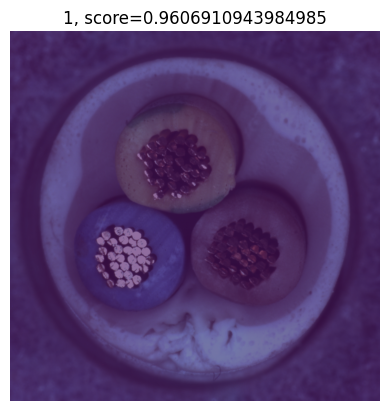

In [6]:
from src.repos.cs_flow.model import load_model
from src.repos.cs_flow.evaluate import evaluate

img_paths = test_set.paths if c.pre_extracted else [p for p, l in test_set.samples]
_, test_loader = make_dataloaders(train_set, test_set)
mod = load_model(c.modelname)
evaluate(mod, test_loader, score_export_dir, map_export_dir, img_paths, localize)